In [52]:
%%bigquery bank_v2
SELECT *, case when y = True then 1 when y = False then 0 end as outcome FROM `bank_v2.bank_v2`

Query is running:   0%|          |

Downloading:   0%|          |

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [53]:
bank_v2.head(5)

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  previous     poutcome  emp_var_rate  cons_price_idx  \
0   may         mon  ...         0  nonexistent           1.1          93.994   
1   may         mon  ...         0  nonexistent           1.1          93.994   
2   may         mon  ...         0  nonexistent           1.1          93.994   
3   may         mon  ...         0  nonexistent           1.1          93.994   
4   may         mon  ...         0  nonexistent           1.1          93.994   

  cons_conf_idx  euribor3m  nr_employed  ModelPrediction      y  outcome  
0         -36.4      4.857       5191.0         0.932750  False        0  
1         -36.4      4.857       5191.0         0.953579  False        0  
2         -36.4      4.857       5191.0         0.945724  False        0  
3         -36.4      4.857       5191.0         0.933875  False        0  
4         -36.4      4.857       5191.0         0.940996  False        0  

[5 rows x 23 columns]

## Exploratory Data Analysis

In [54]:
bank_v2.describe(percentiles=None, include=None, exclude=None)

age    duration  campaign       pdays  previous  emp_var_rate  \
count   41188.0     41188.0   41188.0     41188.0   41188.0  41188.000000   
mean   40.02406   258.28501  2.567593  962.475454  0.172963      0.081886   
std    10.42125  259.279249  2.770014  186.910907  0.494901      1.570960   
min        17.0         0.0       1.0         0.0       0.0     -3.400000   
25%        32.0       102.0       1.0       999.0       0.0     -1.800000   
50%        38.0       180.0       2.0       999.0       0.0      1.100000   
75%        47.0       319.0       3.0       999.0       0.0      1.400000   
max        98.0      4918.0      56.0       999.0       7.0      1.400000   

       cons_price_idx  cons_conf_idx     euribor3m   nr_employed  \
count    41188.000000   41188.000000  41188.000000  41188.000000   
mean        93.575664     -40.502600      3.621291   5167.035911   
std          0.578840       4.628198      1.734447     72.251528   
min         92.201000     -50.800000      0.634000   4963.600000   
25%         93.075000     -42.700000      1.344000   5099.100000   
50%         93.749000     -41.800000      4.857000   5191.000000   
75%         93.994000     -36.400000      4.961000   5228.100000   
max         94.767000     -26.900000      5.045000   5228.100000   

       ModelPrediction   outcome  
count     41188.000000   41188.0  
mean          0.887597  0.112654  
std           0.125351  0.316173  
min           0.250174       0.0  
25%           0.857484       0.0  
50%           0.945879       0.0  
75%           0.959214       0.0  
max           0.988360       1.0

In [55]:
bank_v2.astype

<bound method NDFrame.astype of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [56]:
bank_v2.dtypes

age                  Int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             Int64
campaign             Int64
pdays                Int64
previous             Int64
poutcome            object
emp_var_rate       float64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
ModelPrediction    float64
y                  boolean
outcome              Int64
dtype: object

### Variable Distribution

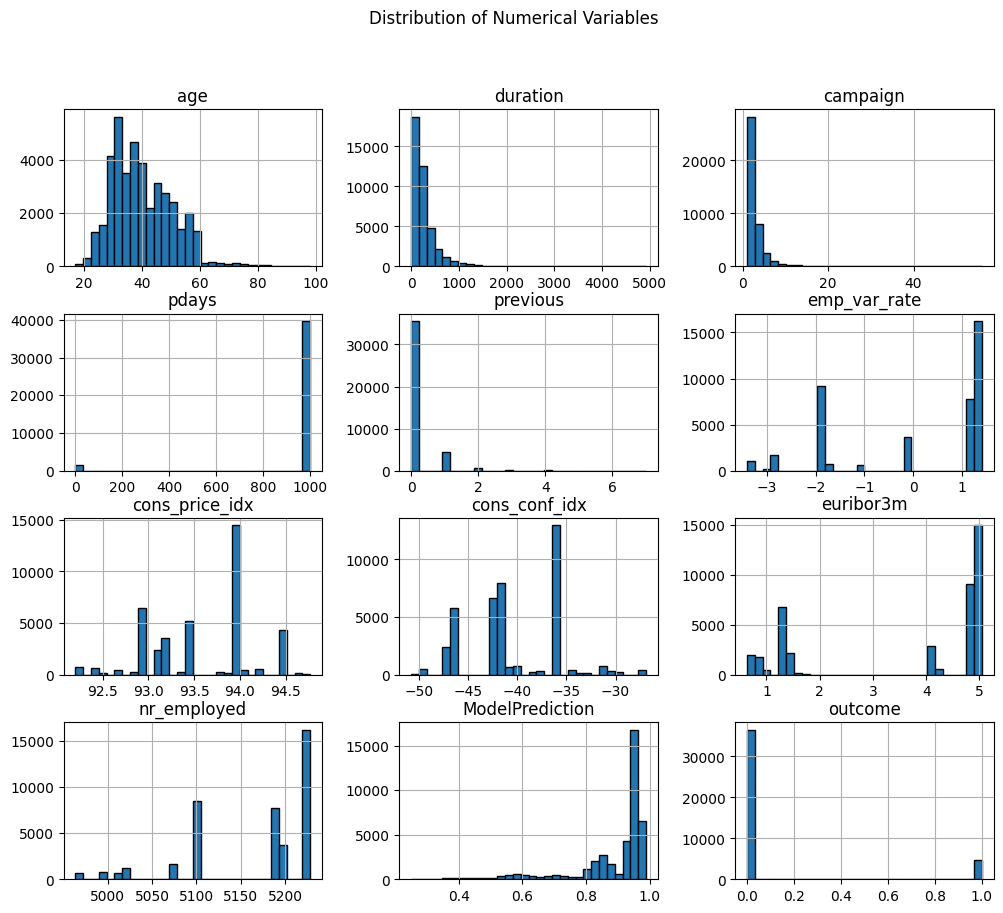

In [57]:
df_numeric = bank_v2.select_dtypes(include=['int64', 'float64'])


df_numeric.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Variables")
plt.show()

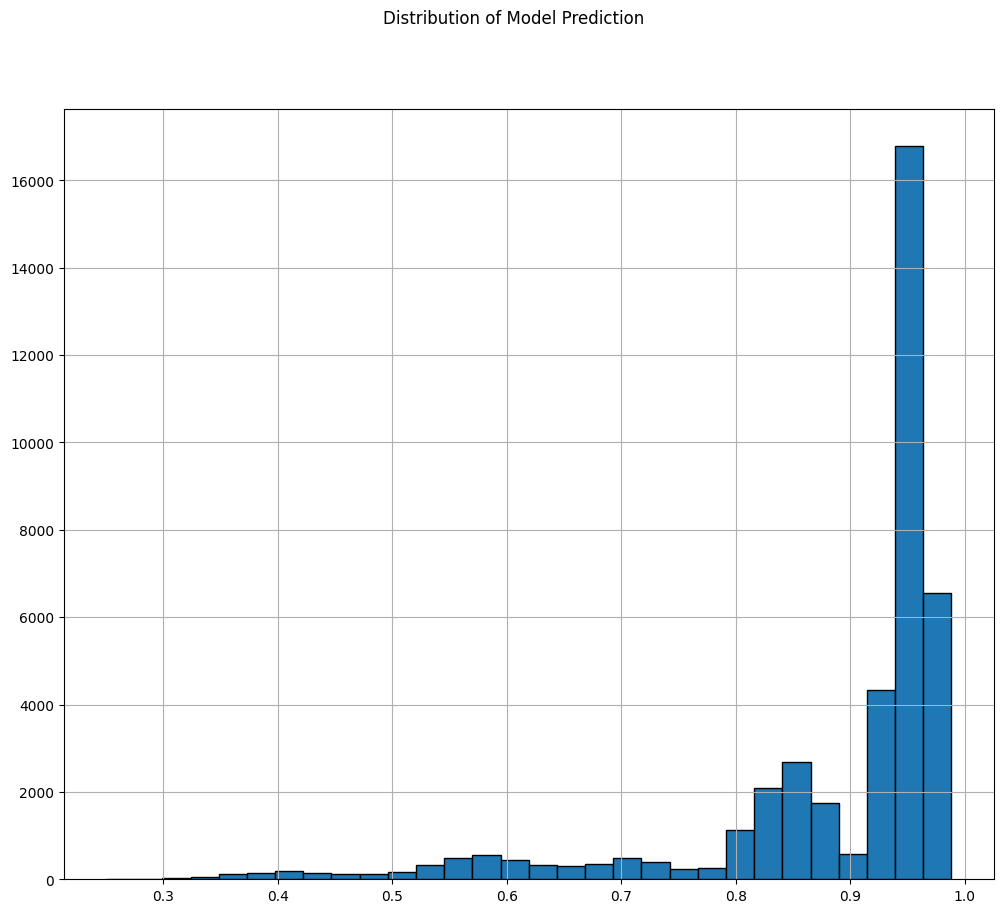

In [58]:
df_pred = bank_v2["ModelPrediction"]


df_pred.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Model Prediction")
plt.show()

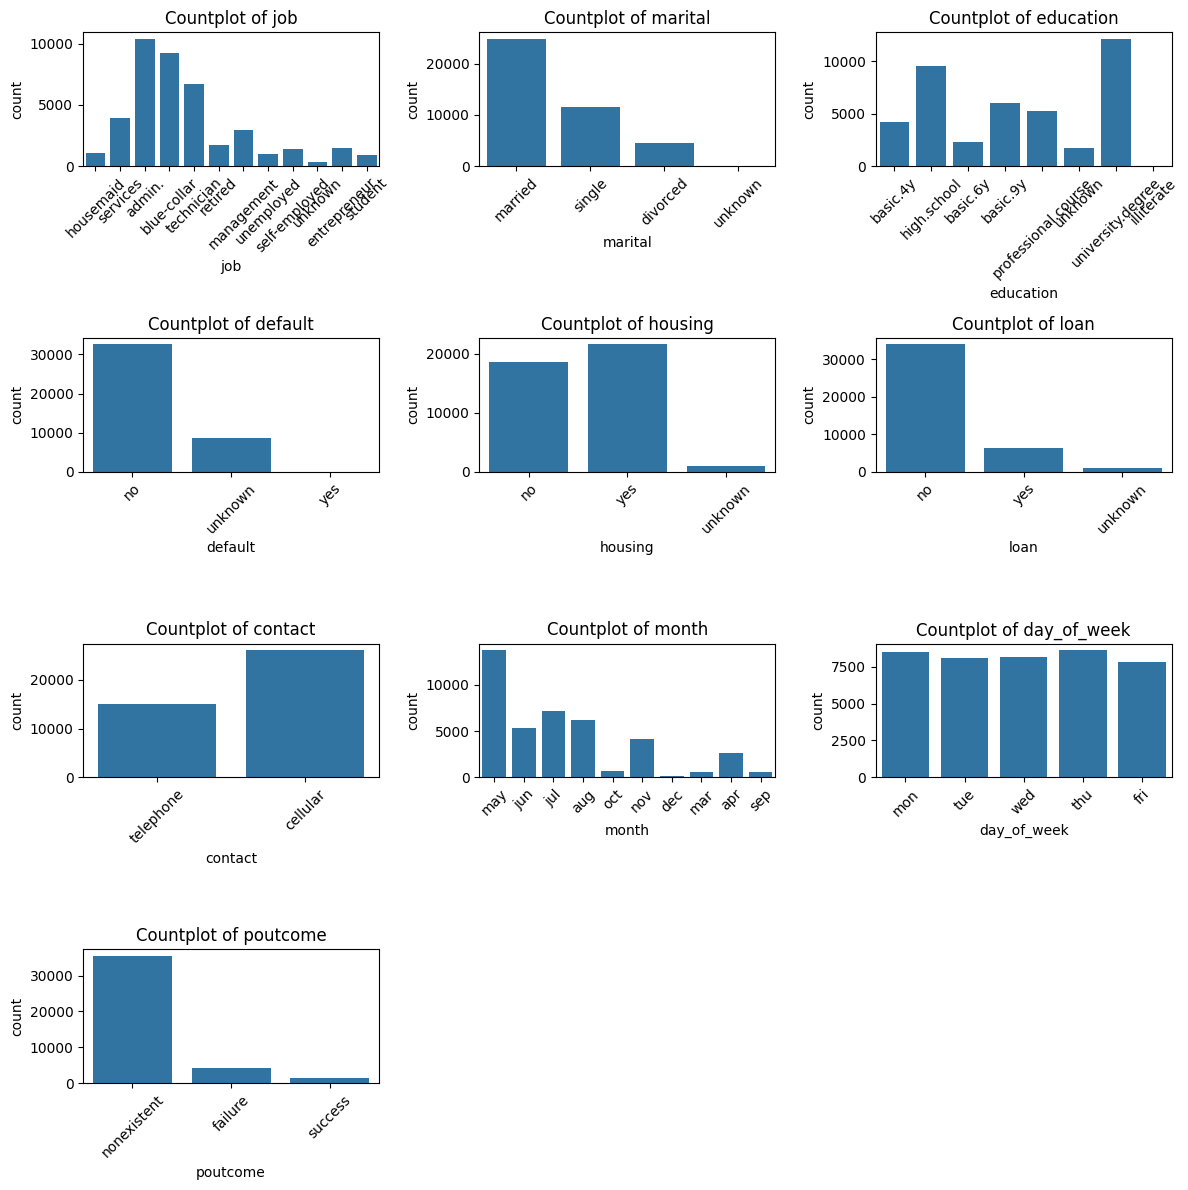

In [59]:
df_categorical = bank_v2.select_dtypes(include=['object'])

num_cols = len(df_categorical.columns)
num_rows = math.ceil(num_cols / 3)


plt.figure(figsize=(12, num_rows * 3))

for i, col in enumerate(df_categorical.columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(x=df_categorical[col])
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

y
False    36548
True      4640
Name: count, dtype: Int64


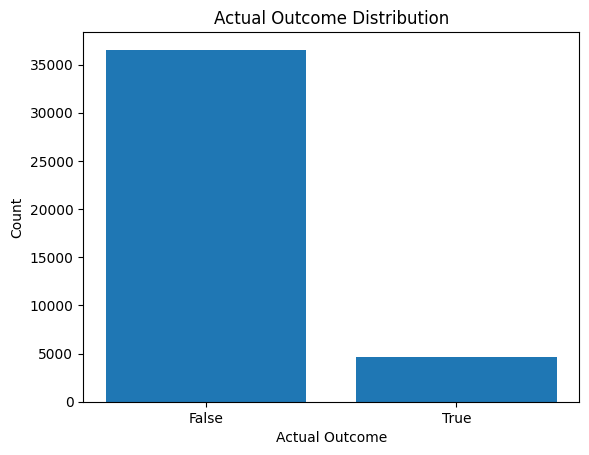

In [60]:
# Actual outcome distribution
counts = bank_v2['y'].value_counts()
print(counts)

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Actual Outcome')
plt.ylabel('Count')
plt.title('Actual Outcome Distribution')
plt.show()

In [61]:
print(counts)

y
False    36548
True      4640
Name: count, dtype: Int64


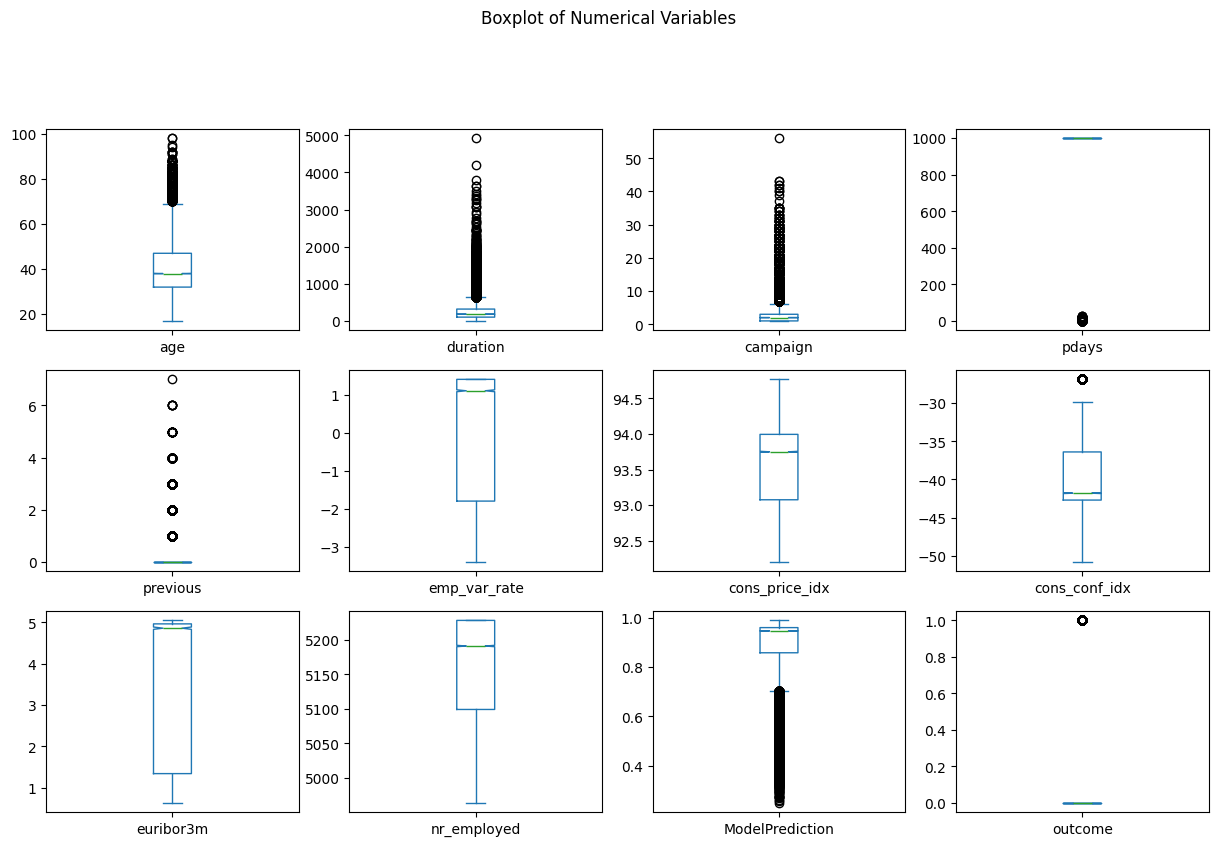

In [62]:
# box chart
df_numeric.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 12), notch=True)
plt.suptitle("Boxplot of Numerical Variables")
plt.show()

### Variable Distribution by Actual Outcome (col "y")

In [63]:
df_numeric = bank_v2.select_dtypes(include=["int64", "float64"]).columns
df_categorical = bank_v2.select_dtypes(include=["object"]).columns

all_vars = list(df_numeric) + list(df_categorical)
num_plots = len(all_vars)

num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6 * num_rows), dpi=600)

axes = axes.flatten()

# histograms for continuous variables
for i, var in enumerate(df_numeric):
    sns.histplot(data=bank_v2, x=var, hue="y", multiple="stack",
                 palette={True: "green", False: "red"}, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {var} with 'y' status")

# bar charts for categorical variables
for j, var in enumerate(df_categorical):
    index = len(df_numeric) + j
    sns.countplot(data=bank_v2, x=var, hue="y",
                  palette={True: "green", False: "red"}, ax=axes[index])
    axes[index].set_title(f"Distribution of {var} with 'y' status")
    axes[index].tick_params(axis='x', rotation=45)

for i in range(num_plots, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

plt.savefig("high_res_plot.png", dpi=600, bbox_inches='tight')
plt.show()


In [41]:
from google.colab import files
files.download("high_res_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Evaluation

In [65]:
y_pred = bank_v2["ModelPrediction"]
y_true = bank_v2["y"]

In [67]:
y_true = bank_v2["y"].astype(int)
print(y_true)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [68]:
# double check
yes = bank_v2[bank_v2['y'] == True]
print(yes)
check = yes[yes['outcome'] == 0]
print(check)

       age           job   marital            education  default housing loan  \
75      41   blue-collar  divorced             basic.4y  unknown     yes   no   
83      49  entrepreneur   married    university.degree  unknown     yes   no   
88      49    technician   married             basic.9y       no      no   no   
129     41    technician   married  professional.course  unknown     yes   no   
139     45   blue-collar   married             basic.9y  unknown     yes   no   
...    ...           ...       ...                  ...      ...     ...  ...   
41174   62       retired   married    university.degree       no     yes   no   
41178   62       retired   married    university.degree       no      no   no   
41181   37        admin.   married    university.degree       no     yes   no   
41183   73       retired   married  professional.course       no     yes   no   
41186   44    technician   married  professional.course       no      no   no   

         contact month day_

### ROC Curve

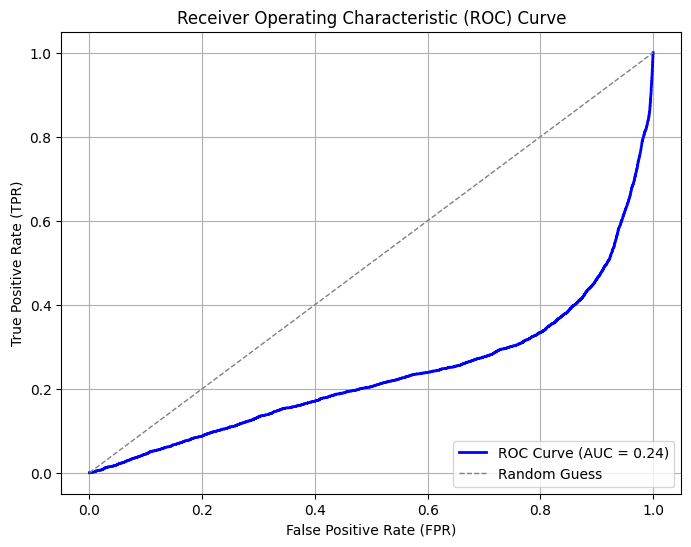

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)

# AUC
roc_auc = auc(fpr, tpr)

# ROC curve Chart
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### PR Curve

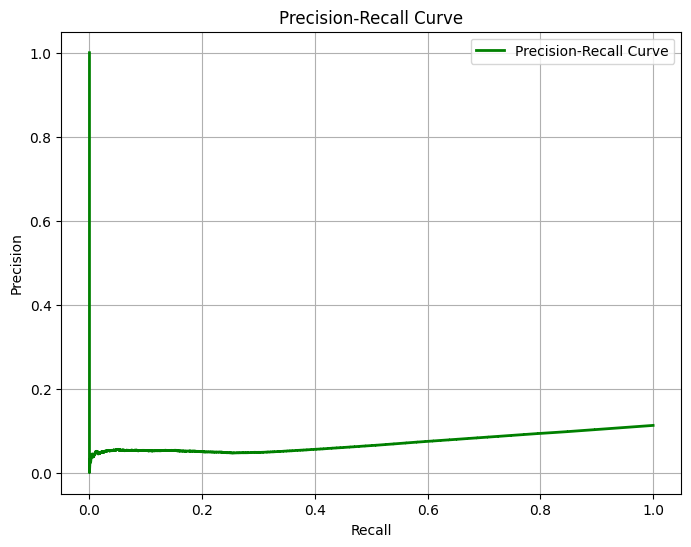

In [70]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

In [71]:
bank_v2.groupby(bank_v2['cons_price_idx'])["outcome"].sum()

cons_price_idx
92.201    264
92.379    106
92.431    180
92.469     66
92.649    168
92.713     88
92.756      1
92.843    126
92.893    524
92.963    264
93.075    442
93.200    190
93.369    150
93.444    271
93.749     97
93.798     42
93.876    122
93.918    407
93.994    240
94.027    120
94.055    107
94.199    150
94.215    176
94.465    188
94.601     93
94.767     58
Name: outcome, dtype: Int64

In [72]:
bank_v2.groupby(bank_v2['y'])["ModelPrediction"].mean()

y
False    0.906841
True     0.736021
Name: ModelPrediction, dtype: float64

In [73]:
bank_v2.groupby(bank_v2['y'])["ModelPrediction"].median()

y
False    0.948100
True     0.792657
Name: ModelPrediction, dtype: float64

In [74]:
edu = bank_v2.groupby([bank_v2['education'], bank_v2['y']])
edu.size()

education            y    
basic.4y             False     3748
                     True       428
basic.6y             False     2104
                     True       188
basic.9y             False     5572
                     True       473
high.school          False     8484
                     True      1031
illiterate           False       14
                     True         4
professional.course  False     4648
                     True       595
university.degree    False    10498
                     True      1670
unknown              False     1480
                     True       251
dtype: int64

In [75]:
# AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

0.23531485696184137

## Logistic Regression
#### 1. check weight of variables and cross check with my explorary analysis
#### 2. check if the accuracy is higher

In [81]:
%%bigquery bank_v2
SELECT * FROM `bank_v2.bank_v2`

Query is running:   0%|          |

Downloading:   0%|          |

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Separate Features (X) and Target (y)
X = bank_v2.drop(columns=["duration", "y", "ModelPrediction"])  # Drop non-predictive columns
y = bank_v2["y"].astype(bool).astype(int)  # Convert to binary (1/0)

# 2. One-Hot Encode Categorical Variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into numerical format

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardize Only Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Scale numerical features
X_test = scaler.transform(X_test)

# 5. Train Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# 6. Make Predictions
y_pred = log_reg.predict(X_test)

# 7. Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# 8. Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Accuracy: 0.90
Precision: 0.64
Recall: 0.21
F1 Score: 0.32
ROC-AUC: 0.60


In [83]:
feature_names = X.columns

# Get logistic regression coefficients
coefficients = log_reg.coef_[0]

feature_weights = pd.DataFrame({'Feature': feature_names, 'Weight': coefficients})

feature_weights = feature_weights.reindex(feature_weights['Weight'].abs().sort_values(ascending=False).index)

print(feature_weights)

                          Feature    Weight
4                    emp_var_rate -2.264200
5                  cons_price_idx  1.168320
8                     nr_employed  0.437996
36              contact_telephone -0.371057
7                       euribor3m  0.360144
2                           pdays -0.224334
42                      month_may -0.211321
40                      month_jun -0.202491
41                      month_mar  0.174168
50           poutcome_nonexistent  0.163638
37                      month_aug  0.147733
43                      month_nov -0.145377
1                        campaign -0.143931
6                   cons_conf_idx  0.138898
51               poutcome_success  0.122881
30                default_unknown -0.091791
46                day_of_week_mon -0.074070
49                day_of_week_wed  0.064760
28    education_university.degree  0.049676
47                day_of_week_thu  0.047459
31                    default_yes -0.045503
9                 job_blue-colla

In [84]:
# Get probability predictions from logistic regression
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

y_pred_binary = (y_pred_prob >= 0.5).astype(int)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test_indices = X_test.index

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df_test = bank_v2.iloc[X_test_indices].copy()


In [87]:
df_test["Logistic_Regression_Pred"] = y_pred_binary
df_test["Logistic_Regression_Prob"] = y_pred_prob

In [88]:
print(df_test[["ModelPrediction", "Logistic_Regression_Pred", "Logistic_Regression_Prob", "y"]].head(10))

       ModelPrediction  Logistic_Regression_Pred  Logistic_Regression_Prob  \
32884         0.853032                         0                  0.059525   
3169          0.949186                         0                  0.021553   
32206         0.888103                         0                  0.058580   
9403          0.957072                         0                  0.049110   
14020         0.966384                         0                  0.061284   
17201         0.953933                         0                  0.086630   
879           0.956309                         0                  0.030043   
23757         0.966533                         0                  0.035400   
10821         0.957836                         0                  0.058043   
14355         0.963006                         0                  0.054006   

           y  
32884  False  
3169   False  
32206  False  
9403   False  
14020  False  
17201  False  
879    False  
23757  False  
10821 

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Original Model's Performance
original_binary_pred = (df_test["ModelPrediction"] >= 0.5).astype(int)
original_accuracy = accuracy_score(df_test["y"], original_binary_pred)
original_f1 = f1_score(df_test["y"], original_binary_pred)

# Your Model's Performance
logistic_accuracy = accuracy_score(df_test["y"], y_pred_binary)
logistic_f1 = f1_score(df_test["y"], y_pred_binary)

# Print results
print(f"Original Model Accuracy: {original_accuracy:.2f}, F1 Score: {original_f1:.2f}")
print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}, F1 Score: {logistic_f1:.2f}")


Original Model Accuracy: 0.10, F1 Score: 0.18
Logistic Regression Accuracy: 0.90, F1 Score: 0.32
